In [4]:
import os
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from scipy import stats
import engarde.decorators as ed

from library import test

ModuleNotFoundError: No module named 'library'

In [3]:
data_path = '/Users/kylieleblancKylie/domino/dofis/data/'
table_path = '/Users/kylieleblancKylie/domino/dofis/results/impact/'
data = pd.read_csv(os.path.join(data_path, 'clean', 'cits.csv'),
                  sep=",", low_memory= False)
@ed.verify(test.alleligible)
def load():
    return data
data = load()
data[['distname', 'year', 'doi_year', 'treat', 'year_centered', 'students_hisp', 'students_num']][data.doi == True].head()

NameError: name 'ed' is not defined

In [3]:
data[data.doi == False][['distname','doi', 'doi_year', 'year', 'treat']].head()

,distname,doi,doi_year,year,treat
10,DIBOLL ISD,False,NaN,2012,0
11,CENTRAL ISD,False,NaN,2012,0
16,CHARLOTTE ISD,False,NaN,2012,0
19,PLEASANTON ISD,False,NaN,2012,0
20,BELLVILLE ISD,False,NaN,2012,0


In [4]:
data[data.year == 2014].doi_year.value_counts().sort_index()

2016.0     63
2017.0    447
2018.0    119
2019.0     22
Name: doi_year, dtype: int64

# ITS

In [5]:
df = pd.DataFrame(data.groupby(['year']).agg({'avescores': 'mean'})).reset_index()

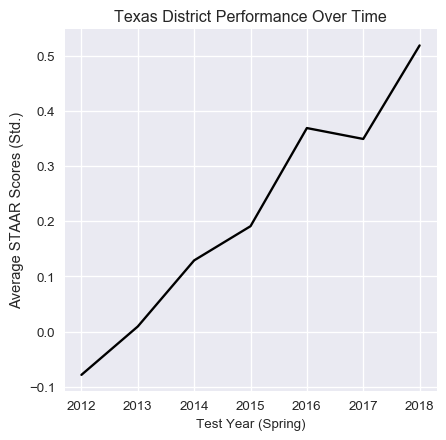

In [6]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(df.year, df.avescores, color = 'black')

plt.ylabel('Average STAAR Scores (Std.)')
plt.title('Texas District Performance Over Time')
plt.xlabel('Test Year (Spring)', size = 'medium')


plt.savefig(table_path + 'its.png', dpi = 600, bbox_inches="tight")
plt.show()

# Graph by year of implementation

In [7]:
def create_group_df(df):
    new_df = pd.DataFrame(df.groupby(['year']).agg({'avescores': ['mean', 'sem']}))
    new_df = new_df.rename(columns = {'mean': 'score_mean', 'sem': 'score_se'})
    new_df['ub'] = new_df['avescores']['score_mean'] + new_df['avescores']['score_se']
    new_df['lb'] = new_df['avescores']['score_mean'] - new_df['avescores']['score_se']
    return new_df
df_control = create_group_df(data[data.doi == False])
df_treat2016 = create_group_df(data[data.doi_year == 2016])
df_treat2017 = create_group_df(data[data.doi_year == 2017])
df_treat2018 = create_group_df(data[data.doi_year == 2018])
df_control

avescores                  ub        lb
     score_mean  score_se                    
year                                         
2012  -0.263204  0.051815 -0.211389 -0.315019
2013  -0.202579  0.054226 -0.148353 -0.256806
2014  -0.076573  0.052238 -0.024335 -0.128812
2015   0.001494  0.052004  0.053498 -0.050510
2016   0.171192  0.052099  0.223291  0.119093
2017   0.111165  0.058436  0.169601  0.052729
2018   0.318133  0.055637  0.373770  0.262495

# Full Set of Years and Groups

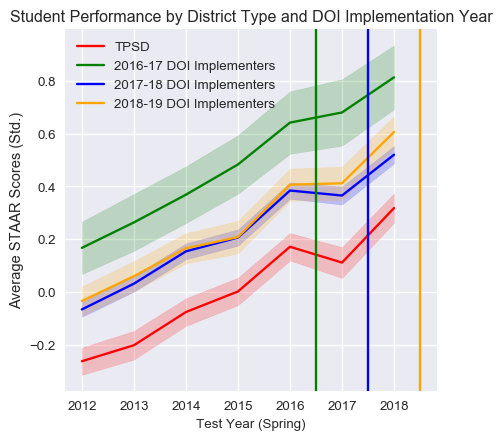

In [8]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(df_control.index, df_control['avescores']['score_mean'], color = 'red', label = 'TPSD')
plt.plot(df_treat2016.index, df_treat2016['avescores']['score_mean'], color = 'green', label = '2016-17 DOI Implementers')
plt.plot(df_treat2017.index, df_treat2017['avescores']['score_mean'], color = 'blue', label = '2017-18 DOI Implementers')
plt.plot(df_treat2018.index, df_treat2018['avescores']['score_mean'], color = 'orange', label = '2018-19 DOI Implementers')

plt.legend()


plt.fill_between(df_control.index, df_control.lb, df_control.ub, color = 'red', alpha = .2)
plt.fill_between(df_treat2016.index, df_treat2016.lb, df_treat2016.ub, color = 'green', alpha = .2)
plt.fill_between(df_treat2017.index, df_treat2017.lb, df_treat2017.ub, color = 'blue', alpha = .2)
plt.fill_between(df_treat2018.index, df_treat2018.lb, df_treat2018.ub, color = 'orange', alpha = .2)

plt.axvline(x = 2016.5, color = 'green')
plt.axvline(x = 2017.5, color = 'blue')
plt.axvline(x = 2018.5, color = 'orange')



plt.ylabel('Average STAAR Scores (Std.)')
plt.title('Student Performance by District Type and DOI Implementation Year')
plt.xlabel('Test Year (Spring)', size = 'medium')


plt.savefig(table_path + 'all districts and dates.png', dpi = 600, bbox_inches="tight")
plt.show()

# Centered
We're not looking at this graph for evidence of parallel trends. Just to look at the impact.

# Evidence of Parallel Trends

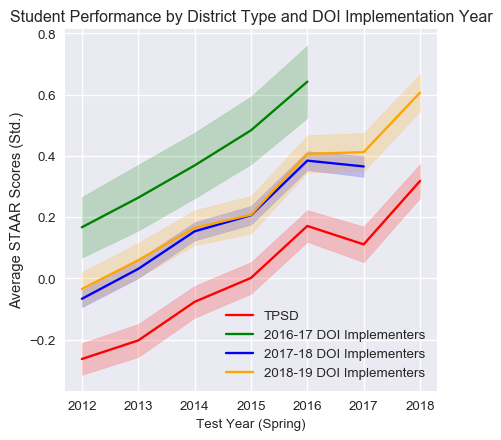

In [9]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(df_control.index, df_control['avescores']['score_mean'], color = 'red', label = 'TPSD')
plt.plot(df_treat2016[df_treat2016.index <= 2016].index, df_treat2016[df_treat2016.index <= 2016]['avescores']['score_mean'], color = 'green', label = '2016-17 DOI Implementers')
plt.plot(df_treat2017[df_treat2017.index <= 2017].index, df_treat2017[df_treat2017.index <= 2017]['avescores']['score_mean'], color = 'blue', label = '2017-18 DOI Implementers')
plt.plot(df_treat2018[df_treat2018.index <= 2018].index, df_treat2018[df_treat2018.index <= 2018]['avescores']['score_mean'], color = 'orange', label = '2018-19 DOI Implementers')

plt.legend()

plt.fill_between(df_control.index, df_control.lb, df_control.ub, color = 'red', alpha = .2)
plt.fill_between(df_treat2016[df_treat2016.index <= 2016].index, df_treat2016[df_treat2016.index <= 2016].lb, df_treat2016[df_treat2016.index <= 2016].ub, color = 'green', alpha = .2)
plt.fill_between(df_treat2017[df_treat2017.index <= 2017].index, df_treat2017[df_treat2017.index <= 2017].lb, df_treat2017[df_treat2017.index <= 2017].ub, color = 'blue', alpha = .2)
plt.fill_between(df_treat2018[df_treat2018.index <= 2018].index, df_treat2018[df_treat2018.index <= 2018].lb, df_treat2018[df_treat2018.index <= 2018].ub, color = 'orange', alpha = .2)


plt.ylabel('Average STAAR Scores (Std.)')
plt.title('Student Performance by District Type and DOI Implementation Year')
plt.xlabel('Test Year (Spring)', size = 'medium')

plt.savefig(table_path + 'parallel_trends_by_adoption.png', bbox_inches="tight")

plt.show()

# Weighted Parallel Trends

total_weight_TPSD = sum(data[data.treat == 0].psweight)
total_weight_DOI16 = sum(data[data.doi_year == 2016].psweight)
total_weight_DOI17 = sum(data[data.doi_year == 2017].psweight)
total_weight_DOI18 = sum(data[data.doi_year == 2018].psweight)
data['pswtshare2'] = np.where(data.treat == 0, (data.psweight/total_weight_TPSD),
                          np.where(data.doi_year == 2016,(data.psweight/total_weight_DOI16),
                          np.where(data.doi_year == 2017, (data.psweight/total_weight_DOI17), 
                                  np.where(data.doi_year == 2018, (data.psweight/total_weight_DOI18), 0))))
sum(data[data.doi == False].pswtshare2)
data['score_weighted'] = (data.avescores * data.pswtshare2)
data[data.doi == False][['distname','avescores', 'pswtshare2', 'score_weighted']].head()

df_control = pd.DataFrame(data[data.doi == False].groupby(['year'])['score_weighted'].sum()).reset_index()
df_treat2016 = pd.DataFrame(data[data.doi_year == 2016].groupby(['year'])['score_weighted'].sum()).reset_index()
df_treat2017 = pd.DataFrame(data[data.doi_year == 2017].groupby(['year'])['score_weighted'].sum()).reset_index()
df_treat2018 = pd.DataFrame(data[data.doi_year == 2018].groupby(['year'])['score_weighted'].sum()).reset_index()
df_control

plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(df_control.year, df_control.score_weighted, color = 'red', label = 'TPSD')
plt.plot(df_treat2016[df_treat2016.year <= 2016].year, df_treat2016[df_treat2016.year <= 2016].score_weighted, color = 'green', label = '2016-17 DOI Implementers')
plt.plot(df_treat2017[df_treat2017.year <= 2017].year, df_treat2017[df_treat2017.year <= 2017].score_weighted, color = 'blue', label = '2017-18 DOI Implementers')
plt.plot(df_treat2018[df_treat2018.year <= 2018].year, df_treat2018[df_treat2018.year <= 2018].score_weighted, color = 'orange', label = '2018-19 DOI Implementers')

plt.legend()



plt.ylabel('Average STAAR Scores (Std.)')
plt.title('Student Performance by District Type and DOI Implementation Year')
plt.xlabel('Year', size = 'medium')

#plt.savefig(table_path + 'CITS.png', bbox_inches="tight")

plt.show()
#TODO: WTF the trends and scale

# DOI vs TPS

In [10]:
df_control = pd.DataFrame(data[data.doi == False].groupby(['year'])['avescores'].mean()).reset_index()
df_treat = pd.DataFrame(data[data.doi == True].groupby(['year'])['avescores'].mean()).reset_index()
df_treat

,year,avescores
0,2012,-0.353384
1,2013,-0.456678
2,2014,-0.251354
3,2015,-0.309562
4,2016,-0.261721
5,2017,-0.255929
6,2018,-0.049236


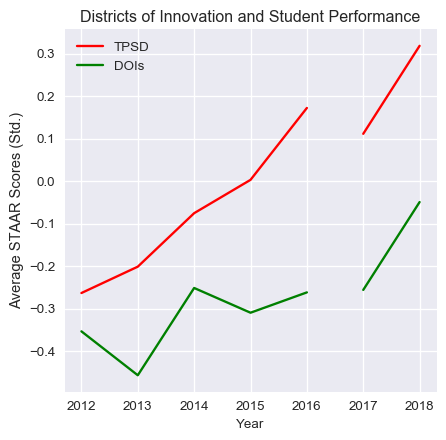

In [11]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(df_control[df_control.year < 2017].year, df_control[df_control.year < 2017].avescores, color = 'red', label = 'TPSD')
plt.plot(df_treat[df_treat.year < 2017].year, df_treat[df_treat.year < 2017].avescores, color = 'green', label = 'DOIs')
plt.legend()

plt.plot(df_control[df_control.year >= 2017].year, df_control[df_control.year >= 2017].avescores, color = 'red')
plt.plot(df_treat[df_treat.year >= 2017].year, df_treat[df_treat.year >= 2017].avescores, color = 'green')





plt.ylabel('Average STAAR Scores (Std.)')
plt.title('Districts of Innovation and Student Performance')
plt.xlabel('Year', size = 'medium')


plt.show()


# Weighted Average

In [12]:
data['score_weighted'] = (data.avescores * data.pswtshare)/100
df_control = pd.DataFrame(data[data.doi == False].groupby(['year'])['score_weighted'].sum()).reset_index()
df_treat = pd.DataFrame(data[data.doi == True].groupby(['year'])['score_weighted'].sum()).reset_index()
df_control

AttributeError: 'DataFrame' object has no attribute 'pswtshare'

In [ ]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(df_control[df_control.year < 2017].year, df_control[df_control.year < 2017].score_weighted, color = 'red', label = 'TPSD')
plt.plot(df_treat[df_treat.year < 2017].year, df_treat[df_treat.year < 2017].score_weighted, color = 'green', label = 'DOIs')
plt.legend()

plt.plot(df_control[df_control.year >= 2017].year, df_control[df_control.year >= 2017].score_weighted, color = 'red')
plt.plot(df_treat[df_treat.year >= 2017].year, df_treat[df_treat.year >= 2017].score_weighted, color = 'green')





plt.ylabel('Average STAAR Scores (Std.)')
plt.title('Districts of Innovation and Student Performance')
plt.xlabel('Year', size = 'medium')


plt.show()

# Demographic Trends

In [ ]:
df_control = pd.DataFrame(data[data.doi == False].groupby(['year'])['students_hisp'].mean()).reset_index()
df_treat2016 = pd.DataFrame(data[data.doi_year == 2016].groupby(['year'])['students_hisp'].mean()).reset_index()
df_treat2017 = pd.DataFrame(data[data.doi_year == 2017].groupby(['year'])['students_hisp'].mean()).reset_index()
df_treat2018 = pd.DataFrame(data[data.doi_year == 2018].groupby(['year'])['students_hisp'].mean()).reset_index()
df_treat2018

In [ ]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(df_control.year, df_control.students_hisp, color = 'red', label = 'TPS')
plt.plot(df_treat2016.year, df_treat2016.students_hisp, color = 'green', label = '2016-17 Implementers')
plt.plot(df_treat2017.year, df_treat2017.students_hisp, color = 'blue', label = '2017-18 Implementers')
plt.plot(df_treat2018.year, df_treat2018.students_hisp, color = 'orange', label = '2018-19 Implementers')

plt.legend()



plt.ylabel('Percent Hispanic')
plt.title('Districts of Innovation and Student Performance')
plt.xlabel('Year', size = 'medium')

#plt.savefig(table_path + 'CITS.png', bbox_inches="tight")

plt.show()

In [ ]:
df_control = pd.DataFrame(data[data.doi == False].groupby(['year'])['students_num'].mean()).reset_index()
df_treat2016 = pd.DataFrame(data[data.doi_year == 2016].groupby(['year'])['students_num'].mean()).reset_index()
df_treat2017 = pd.DataFrame(data[data.doi_year == 2017].groupby(['year'])['students_num'].mean()).reset_index()
df_treat2018 = pd.DataFrame(data[data.doi_year == 2018].groupby(['year'])['students_num'].mean()).reset_index()
df_treat2018

In [ ]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(df_control.year, df_control.students_num, color = 'red', label = 'TPS')
plt.plot(df_treat2016[df_treat2016.year <= 2016].year, df_treat2016[df_treat2016.year <= 2016].students_num, color = 'green', label = '2016-17 Implementers')
plt.plot(df_treat2017[df_treat2017.year <= 2017].year, df_treat2017[df_treat2017.year <= 2017].students_num, color = 'blue', label = '2017-18 Implementers')
plt.plot(df_treat2018[df_treat2018.year <= 2018].year, df_treat2018[df_treat2018.year <= 2018].students_num, color = 'orange', label = '2018-19 Implementers')

plt.legend()



plt.ylabel('Number of Students')
plt.title('Districts of Innovation and Student Performance')
plt.xlabel('Year', size = 'medium')

#plt.savefig(table_path + 'CITS.png', bbox_inches="tight")

plt.show()

In [ ]:
#  Who are 2016-17 implementers
data[(data.doi_year == 2016) & (data.year == 2018)][['distname', 'students_num']]
